### Measuring transaction costs and trading volume

In [11]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as scipy
sys.path.append("utils")
import dynamic_backtesting as db
from compare_strategies import calc_transaction_costs as ctc
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["black", "green",  "deepskyblue", "orange","grey", "lime", "purple", "Gold", "brown", "blue", "pink"]) 

In [8]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
asset_names = list(assets.values())

In [24]:
models = ['sGARCH10', 'sGARCH11', 'gjrGARCH11']
tuning_gamma_Ds = [1.52e-6, 1.3e-5, 1e-4]

In [51]:
def remove_extreme(num, tolerance):
    if num > tolerance:
        return tolerance
    return num

In [52]:
def calc_TC(model, tuning_gamma_D):
    v_t_s, out_of_sample, in_sample, Omega_ts = db.garch_with_trading_cost(tickers, model_type=model, tuning_gamma_D=tuning_gamma_D)
    out_of_sample = out_of_sample.divide(100)
    TC = ctc(v_t_s, out_of_sample, Omega_ts)
    TC = [remove_extreme(x, 1) for x in TC]
    return TC

In [ ]:
TCs = []
for i, model in enumerate(models):
    row = []
    for j, tuning_gamma_D in enumerate(tuning_gamma_Ds):
        row.append(calc_TC(model, tuning_gamma_D))
    TCs.append(row)

['EEM', 'IVV', 'IEV', 'IXN', 'IYR', 'IXG', 'EXI', 'GC=F', 'BZ=F', 'HYG', 'TLT']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 1.52e-06
['EEM', 'IVV', 'IEV', 'IXN', 'IYR', 'IXG', 'EXI', 'GC=F', 'BZ=F', 'HYG', 'TLT']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 1.3e-05
['EEM', 'IVV', 'IEV', 'IXN', 'IYR', 'IXG', 'EXI', 'GC=F', 'BZ=F', 'HYG', 'TLT']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 0.0001
['EEM', 'IVV', 'IEV', 'IXN', 'IYR', 'IXG', 'EXI', 'GC=F', 'BZ=F', 'HYG', 'TLT']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 1.52e-06
['EEM', 'IVV', 'IEV', 'IXN', 'IYR', 'IXG', 'EXI', 'GC=F', 'BZ=F', 'HYG', 'TLT']
Solving problem with trading costs. gamma_D = 1.526988705495546e-06, tuning gamma_D = 1.3e-05


In [38]:
mean_TCs = [[np.nanmean(TC) for TC in TC_row] for TC_row in TCs]

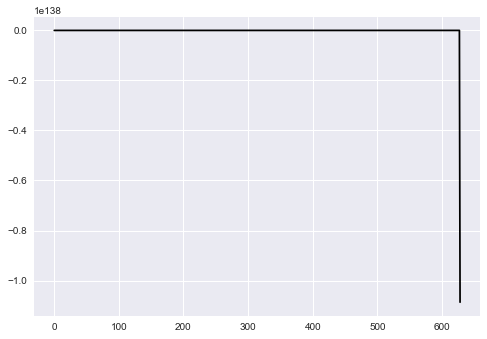

In [44]:
#TCs[0][0]
plt.plot(TCs[0][0])

In [39]:
mean_TCs

[[-1.7275941967655478e+135, 0.001435516291568804, 4.0532075025859905e-05],
 [0.001053570579323892, 8.258182537267141e-05, 6.032956173143117e-06],
 [0.0011895474495571003, 9.719638047158114e-05, 7.256825289390572e-06]]

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6), dpi=192)


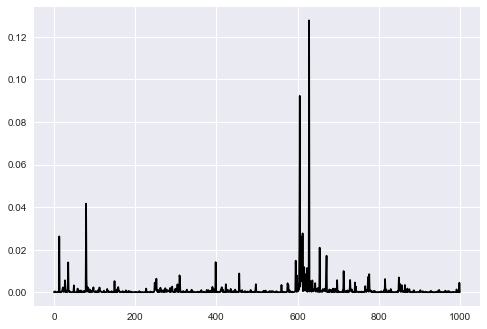

In [22]:
plt.plot()